In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
dataset_dir = "C:\\Users\\kulka\\Downloads\\DL\\DL\\caltech-101-img"
dataset_datagen = ImageDataGenerator(rescale=1.0/255)

dataset_batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64,64),
    batch_size=dataset_batch_size,
    class_mode='categorical',
    shuffle= True
)

Found 9144 images belonging to 102 classes.


In [3]:
xtrain,ytrain = dataset_generator[0]
xtest,ytest = dataset_generator[1]

In [4]:
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights = weights_path, include_top = False, input_shape=(64,64,3))

In [5]:
for layer in base_model.layers:
    layer.trainable = False

In [6]:
x = Flatten()(base_model.output)
x = Dense(64,activation='relu')(x)
predictions = Dense(102,activation='softmax')(x)

model = Model(inputs=base_model.input,outputs=predictions)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(xtrain,ytrain,epochs=10,batch_size=64,validation_data=(xtest,ytest))

Epoch 1/10
32/32 [==============================] - 34s 1s/step - loss: 3.9241 - accuracy: 0.2130 - val_loss: 3.3966 - val_accuracy: 0.2735
Epoch 2/10
32/32 [==============================] - 39s 1s/step - loss: 2.9625 - accuracy: 0.3540 - val_loss: 2.9602 - val_accuracy: 0.3745
Epoch 3/10
32/32 [==============================] - 39s 1s/step - loss: 2.4530 - accuracy: 0.4755 - val_loss: 2.5995 - val_accuracy: 0.4470
Epoch 4/10
32/32 [==============================] - 38s 1s/step - loss: 2.0336 - accuracy: 0.5635 - val_loss: 2.3526 - val_accuracy: 0.4875
Epoch 5/10
32/32 [==============================] - 38s 1s/step - loss: 1.7042 - accuracy: 0.6295 - val_loss: 2.1926 - val_accuracy: 0.5180
Epoch 6/10
32/32 [==============================] - 38s 1s/step - loss: 1.4572 - accuracy: 0.6805 - val_loss: 2.0758 - val_accuracy: 0.5385
Epoch 7/10
32/32 [==============================] - 38s 1s/step - loss: 1.2600 - accuracy: 0.7270 - val_loss: 1.9856 - val_accuracy: 0.5500
Epoch 8/10
32/32 [==

In [17]:
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights = weights_path, include_top = False, input_shape=(64,64,3))

for layer in base_model.layers:
    layer.trainable = False
    
for layer in base_model.layers[len(base_model.layers) - 4:]:
    layer.trainable = True

x = Flatten()(base_model.output)
x = Dense(512,activation='relu')(x)
predictions = Dense(102,activation='softmax')(x)

model = Model(inputs=base_model.input,outputs=predictions)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(xtrain,ytrain,epochs=10,batch_size=64,validation_data=(xtest,ytest))

Epoch 1/10
32/32 [==============================] - 59s 2s/step - loss: 3.8619 - accuracy: 0.1890 - val_loss: 3.4961 - val_accuracy: 0.2325
Epoch 2/10
32/32 [==============================] - 61s 2s/step - loss: 3.2129 - accuracy: 0.3110 - val_loss: 3.1668 - val_accuracy: 0.3145
Epoch 3/10
32/32 [==============================] - 61s 2s/step - loss: 2.8219 - accuracy: 0.3770 - val_loss: 2.8243 - val_accuracy: 0.3740
Epoch 4/10
32/32 [==============================] - 62s 2s/step - loss: 2.3812 - accuracy: 0.4320 - val_loss: 2.5214 - val_accuracy: 0.4345
Epoch 5/10
32/32 [==============================] - 62s 2s/step - loss: 1.9066 - accuracy: 0.5160 - val_loss: 2.5714 - val_accuracy: 0.4410
Epoch 6/10
32/32 [==============================] - 63s 2s/step - loss: 1.6805 - accuracy: 0.5720 - val_loss: 2.1749 - val_accuracy: 0.5130
Epoch 7/10
32/32 [==============================] - 64s 2s/step - loss: 1.1925 - accuracy: 0.6740 - val_loss: 2.2900 - val_accuracy: 0.5035
Epoch 8/10
32/32 [==

In [18]:
ypred = model.predict(xtest)

63/63 [==============================] - 18s 290ms/step


In [19]:
labels = list(dataset_generator.class_indices.keys())

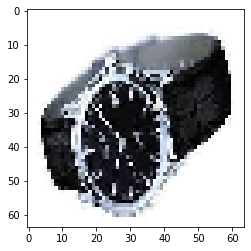

Predicted: watch
Actual: watch


In [20]:
n = random.randint(0,99)
plt.imshow(xtest[n])
plt.show()
print("Predicted:",labels[np.argmax(ypred[n])])
print("Actual:",labels[np.argmax(ytest[n])])